In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score
import graphviz


In [117]:
data_path = "./data/titanic_train.csv"
data_train_path = "./data/titanic_test.csv"

train = pd.read_csv(data_path, sep=",")
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [121]:
def preprocess_data(data):
    new_dataframe = pd.DataFrame()
    
    new_dataframe['Age'] = data.Age.fillna(data.Age.mean())
    new_dataframe['Sex'] = pd.Series([1 if s == 'male' else 0 for s in data.Sex], name = 'Sex')
    new_dataframe['Pclass'] = data.Pclass
    new_dataframe['Fare'] = data.Fare
    
    return new_dataframe

In [122]:
test_data = preprocess_data(train)
test_labels = train.Survived

In [138]:
classifier = tree.DecisionTreeClassifier(max_depth=6)

In [139]:
clf = classifier.fit(test_data, test_labels)

In [140]:
predicao = classifier.predict(test_data)

In [141]:
print('Score: {}'.format(classifier.score(test_data, test_labels)))

Score: 0.8664421997755332


In [96]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=test_data.columns,  
                         class_names=['0','1', '2'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

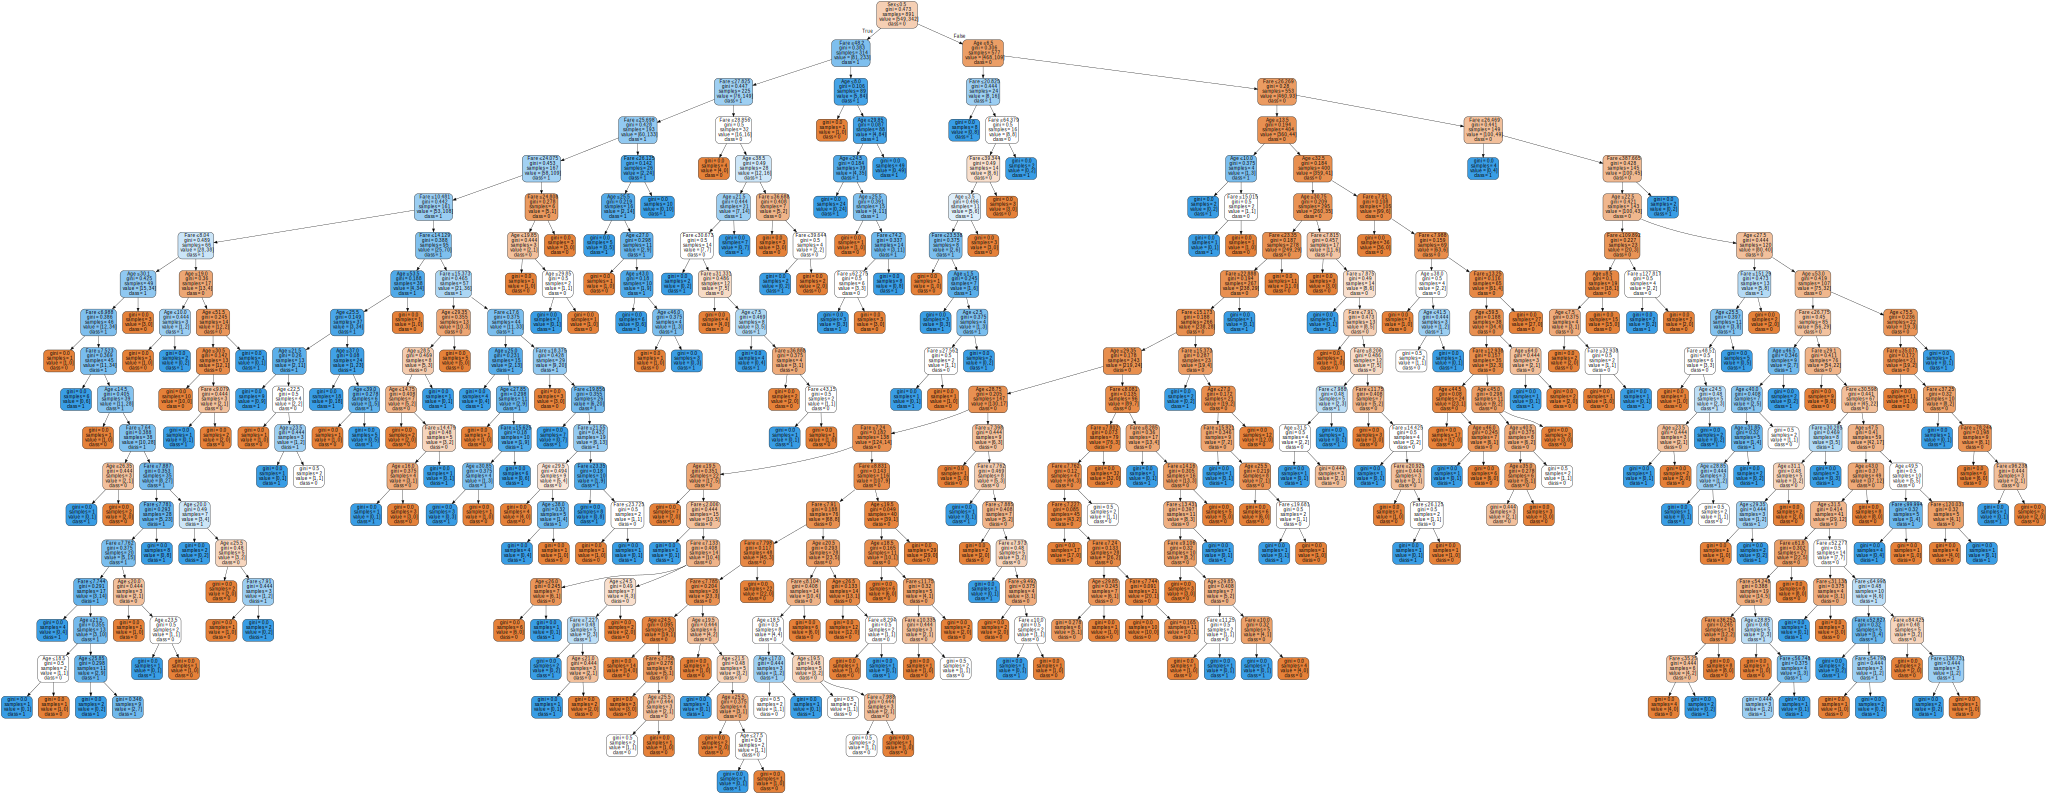

In [97]:
graph = graphviz.Source(dot_data)  

graph 